## Libraries and Dataset 

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [184]:
# Reading Dataset
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [185]:
train


,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,5.457726e+14,5756133,F,2016-06-01T07:59:39Z,2016-06-01T00:00:00Z,30,SÃO JOSÉ,0,1,0,0,0,0
1,Yes,6.223516e+13,5743674,M,2016-05-30T09:16:07Z,2016-06-03T00:00:00Z,4,SANTOS DUMONT,0,0,0,0,0,1
2,No,6.888543e+13,5649002,F,2016-05-02T17:21:36Z,2016-05-02T00:00:00Z,57,BONFIM,0,1,0,0,0,0
3,No,9.649438e+12,5675313,M,2016-05-09T13:32:08Z,2016-05-09T00:00:00Z,16,TABUAZEIRO,1,0,0,0,0,0
4,Yes,8.218344e+13,5686071,M,2016-05-11T11:55:02Z,2016-05-18T00:00:00Z,36,MARIA ORTIZ,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66310,No,9.173495e+14,5732667,F,2016-05-24T12:11:09Z,2016-05-24T00:00:00Z,79,VILA RUBIM,0,1,0,0,0,0
66311,No,6.838621e+13,5714918,F,2016-05-18T13:23:25Z,2016-06-03T00:00:00Z,6,SANTOS DUMONT,1,0,0,0,0,1
66312,Yes,9.185196e+14,5623378,F,2016-04-26T13:59:09Z,2016-05-19T00:00:00Z,15,SANTA MARTHA,0,0,0,0,0,0
66313,No,1.566511e+12,5751411,M,2016-05-31T10:05:14Z,2016-05-31T00:00:00Z,39,JARDIM DA PENHA,0,0,0,0,0,0


In [186]:
test

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,Yes,4.378332e+14,5688819,F,2016-05-12T07:40:56Z,2016-06-07T00:00:00Z,3,JARDIM DA PENHA,0,0,0,0,0,1
1,No,5.671189e+12,5696836,F,2016-05-13T14:24:26Z,2016-05-17T00:00:00Z,65,MARUÍPE,0,1,0,0,0,0
2,No,8.546277e+12,5705565,F,2016-05-17T07:17:40Z,2016-05-19T00:00:00Z,54,JARDIM DA PENHA,0,0,0,0,0,0
3,No,4.294665e+12,5596320,F,2016-04-18T14:23:06Z,2016-05-19T00:00:00Z,17,RESISTÊNCIA,1,0,0,0,0,0
4,No,5.394721e+13,5640750,M,2016-04-29T11:21:27Z,2016-05-02T00:00:00Z,0,MARIA ORTIZ,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22101,Yes,7.320000e+10,5719168,F,2016-05-19T10:41:44Z,2016-05-19T00:00:00Z,27,CARATOÍRA,0,0,0,0,0,0
22102,No,2.947152e+12,5737402,F,2016-05-25T09:33:04Z,2016-05-25T00:00:00Z,63,CONSOLAÇÃO,0,1,0,0,0,0
22103,No,3.554831e+14,5653149,F,2016-05-03T11:25:17Z,2016-05-03T00:00:00Z,9,REDENÇÃO,0,0,0,0,0,0
22104,No,9.895795e+12,5710685,F,2016-05-17T17:19:30Z,2016-05-18T00:00:00Z,61,ITARARÉ,0,1,0,0,0,0


## Analysis and Data cleaning

In [187]:
# Analyzing DTypes of train and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66315 entries, 0 to 66314
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No-show         66315 non-null  object 
 1   PatientId       66315 non-null  float64
 2   AppointmentID   66315 non-null  int64  
 3   Gender          66315 non-null  object 
 4   ScheduledDay    66315 non-null  object 
 5   AppointmentDay  66315 non-null  object 
 6   Age             66315 non-null  int64  
 7   Neighbourhood   66315 non-null  object 
 8   Scholarship     66315 non-null  int64  
 9   Hipertension    66315 non-null  int64  
 10  Diabetes        66315 non-null  int64  
 11  Alcoholism      66315 non-null  int64  
 12  Handcap         66315 non-null  int64  
 13  SMS_received    66315 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 7.1+ MB


In [188]:
# Analyzing DTypes of train and memory usage
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22106 entries, 0 to 22105
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No-show         22106 non-null  object 
 1   PatientId       22106 non-null  float64
 2   AppointmentID   22106 non-null  int64  
 3   Gender          22106 non-null  object 
 4   ScheduledDay    22106 non-null  object 
 5   AppointmentDay  22106 non-null  object 
 6   Age             22106 non-null  int64  
 7   Neighbourhood   22106 non-null  object 
 8   Scholarship     22106 non-null  int64  
 9   Hipertension    22106 non-null  int64  
 10  Diabetes        22106 non-null  int64  
 11  Alcoholism      22106 non-null  int64  
 12  Handcap         22106 non-null  int64  
 13  SMS_received    22106 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 2.4+ MB


In [189]:
# checking if there are null values
train.isnull().sum()

No-show           0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

In [190]:
test.isnull().sum()

No-show           0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

Dunque non sono presenti valori nulli

In [191]:
# Tranforming the dates in a correct standard
train.ScheduledDay = train.ScheduledDay.apply(np.datetime64)
test.AppointmentDay = test.AppointmentDay.apply(np.datetime64)

train.AppointmentDay = train.AppointmentDay.apply(np.datetime64)
test.ScheduledDay = test.ScheduledDay.apply(np.datetime64)


In [192]:
# Calculating the days of waiting between scheduled days and appointment days

train["Days_waiting"]= (train["AppointmentDay"].dt.date - train["ScheduledDay"].dt.date).dt.days
test["Days_waiting"]= (test["AppointmentDay"].dt.date - test["ScheduledDay"].dt.date).dt.days
train

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Days_waiting
0,No,5.457726e+14,5756133,F,2016-06-01 07:59:39,2016-06-01,30,SÃO JOSÉ,0,1,0,0,0,0,0
1,Yes,6.223516e+13,5743674,M,2016-05-30 09:16:07,2016-06-03,4,SANTOS DUMONT,0,0,0,0,0,1,4
2,No,6.888543e+13,5649002,F,2016-05-02 17:21:36,2016-05-02,57,BONFIM,0,1,0,0,0,0,0
3,No,9.649438e+12,5675313,M,2016-05-09 13:32:08,2016-05-09,16,TABUAZEIRO,1,0,0,0,0,0,0
4,Yes,8.218344e+13,5686071,M,2016-05-11 11:55:02,2016-05-18,36,MARIA ORTIZ,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66310,No,9.173495e+14,5732667,F,2016-05-24 12:11:09,2016-05-24,79,VILA RUBIM,0,1,0,0,0,0,0
66311,No,6.838621e+13,5714918,F,2016-05-18 13:23:25,2016-06-03,6,SANTOS DUMONT,1,0,0,0,0,1,16
66312,Yes,9.185196e+14,5623378,F,2016-04-26 13:59:09,2016-05-19,15,SANTA MARTHA,0,0,0,0,0,0,23
66313,No,1.566511e+12,5751411,M,2016-05-31 10:05:14,2016-05-31,39,JARDIM DA PENHA,0,0,0,0,0,0,0


In [193]:
# Dividing the waiting days into groups 
bins = [0,30,90,180,365,1000]
labels=["0-1m","1-3m","3-6m","6m-1y","1y+"]

train["waitingDays"]= pd.cut(train["Days_waiting"], bins=bins, labels=labels, right=False)
train["waitingDays"]= train["waitingDays"].cat.add_categories('unknown').fillna('unknown')

test["waitingDays"]= pd.cut(train["Days_waiting"], bins=bins, labels=labels, right=False)
test["waitingDays"]= test["waitingDays"].cat.add_categories('unknown').fillna('unknown')



In [194]:
# Dividing patients ages in groups
bins = [0,18,50,90,130]
labels=["<18","18-50","50-90",">90"]

train["groupAges"]= pd.cut(train["Age"], bins=bins, labels=labels, right=False)
train["groupAges"]= train["groupAges"].cat.add_categories('unknown').fillna('unknown')

test["groupAges"]= pd.cut(train["Age"], bins=bins, labels=labels, right=False)
test["groupAges"]= test["groupAges"].cat.add_categories('unknown').fillna('unknown')
train

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Days_waiting,waitingDays,groupAges
0,No,5.457726e+14,5756133,F,2016-06-01 07:59:39,2016-06-01,30,SÃO JOSÉ,0,1,0,0,0,0,0,0-1m,18-50
1,Yes,6.223516e+13,5743674,M,2016-05-30 09:16:07,2016-06-03,4,SANTOS DUMONT,0,0,0,0,0,1,4,0-1m,<18
2,No,6.888543e+13,5649002,F,2016-05-02 17:21:36,2016-05-02,57,BONFIM,0,1,0,0,0,0,0,0-1m,50-90
3,No,9.649438e+12,5675313,M,2016-05-09 13:32:08,2016-05-09,16,TABUAZEIRO,1,0,0,0,0,0,0,0-1m,<18
4,Yes,8.218344e+13,5686071,M,2016-05-11 11:55:02,2016-05-18,36,MARIA ORTIZ,0,0,0,0,0,0,7,0-1m,18-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66310,No,9.173495e+14,5732667,F,2016-05-24 12:11:09,2016-05-24,79,VILA RUBIM,0,1,0,0,0,0,0,0-1m,50-90
66311,No,6.838621e+13,5714918,F,2016-05-18 13:23:25,2016-06-03,6,SANTOS DUMONT,1,0,0,0,0,1,16,0-1m,<18
66312,Yes,9.185196e+14,5623378,F,2016-04-26 13:59:09,2016-05-19,15,SANTA MARTHA,0,0,0,0,0,0,23,0-1m,<18
66313,No,1.566511e+12,5751411,M,2016-05-31 10:05:14,2016-05-31,39,JARDIM DA PENHA,0,0,0,0,0,0,0,0-1m,18-50


## Graphical Trends
Analyzing graphical trends of some possibile relation: groupAges-noShow, Gender-noShow, show-noShow

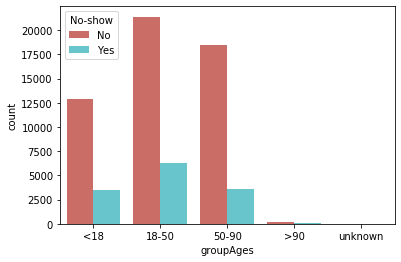

In [196]:
chartAN=sns.countplot(x="groupAges",hue= "No-show", data=train,palette= 'hls')

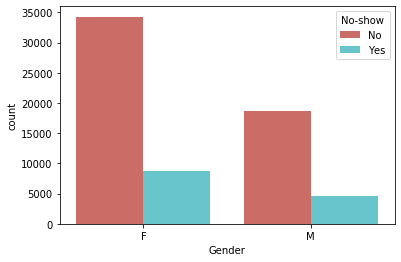

In [197]:
chartGN=sns.countplot(x="Gender",hue= "No-show", data=train, palette='hls')

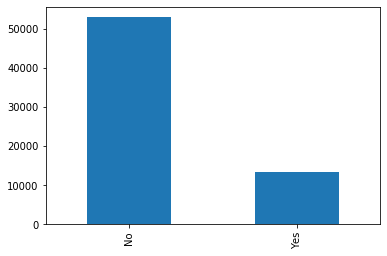

In [198]:
chartSN = train["No-show"].value_counts().plot(kind='bar')

## Comparison of Modulation Techinques

In [199]:
# encoding
le = LabelEncoder()
for c in ["Gender"] :
    train[c] = le.fit_transform(train[c])
    test[c] = le.transform(test[c])
for a in ["Neighbourhood"] :
    train[a] = le.fit_transform(train[a])
    test[a] = le.transform(test[a])


In [173]:
# new dataset info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66315 entries, 0 to 66314
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PatientId       66315 non-null  float64       
 1   AppointmentID   66315 non-null  int64         
 2   Gender          66315 non-null  int64         
 3   ScheduledDay    66315 non-null  datetime64[ns]
 4   AppointmentDay  66315 non-null  datetime64[ns]
 5   Age             66315 non-null  int64         
 6   Neighbourhood   66315 non-null  int32         
 7   Scholarship     66315 non-null  int64         
 8   Hipertension    66315 non-null  int64         
 9   Diabetes        66315 non-null  int64         
 10  Alcoholism      66315 non-null  int64         
 11  Handcap         66315 non-null  int64         
 12  SMS_received    66315 non-null  int64         
 13  Days_waiting    66315 non-null  int64         
 14  waitingDays     66315 non-null  category      
 15  gr

In [175]:
# Dropping 
X_train, y_train = train.drop(['No-show'],axis=1), train['No-show']
X_test, y_test = test.drop(['No-show'],axis=1), test['No-show']

In [165]:
train

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Days_waiting,waitingDays,groupAges
0,No,5.457726e+14,5756133,0,2016-06-01 07:59:39,2016-06-01,30,76,0,1,0,0,0,0,0,0-1m,18-50
1,Yes,6.223516e+13,5743674,1,2016-05-30 09:16:07,2016-06-03,4,70,0,0,0,0,0,1,4,0-1m,<18
2,No,6.888543e+13,5649002,0,2016-05-02 17:21:36,2016-05-02,57,8,0,1,0,0,0,0,0,0-1m,50-90
3,No,9.649438e+12,5675313,1,2016-05-09 13:32:08,2016-05-09,16,78,1,0,0,0,0,0,0,0-1m,<18
4,Yes,8.218344e+13,5686071,1,2016-05-11 11:55:02,2016-05-18,36,43,0,0,0,0,0,0,7,0-1m,18-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66310,No,9.173495e+14,5732667,0,2016-05-24 12:11:09,2016-05-24,79,80,0,1,0,0,0,0,0,0-1m,50-90
66311,No,6.838621e+13,5714918,0,2016-05-18 13:23:25,2016-06-03,6,70,1,0,0,0,0,1,16,0-1m,<18
66312,Yes,9.185196e+14,5623378,0,2016-04-26 13:59:09,2016-05-19,15,66,0,0,0,0,0,0,23,0-1m,<18
66313,No,1.566511e+12,5751411,1,2016-05-31 10:05:14,2016-05-31,39,39,0,0,0,0,0,0,0,0-1m,18-50


In [ ]:
#LogisticRegression
for c in [0.001,0.01,0.1,1,10,100,1000]:
    logreg = LogisticRegression(C=c, random_state=0)
    logreg.fit(X_train, y_train)

In [ ]:
#Decision Tree
model = DecisionTreeClassifier( random_state=1)
model.fit(X_train, y_train)